In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

In [1]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
    %load_ext tensorboard
import tensorflow as tf
tf.__version__

'2.1.0'

In [3]:
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from local.lib import mlutils
import pickle, bz2
import numpy as np
%matplotlib inline

# Lab: convolution matrix for convolution and transposed convolutions

Read and understand well how the convolution matrix is built: [Up-sampling with Transposed Convolution](https://towardsdatascience.com/up-sampling-with-transposed-convolution-9ae4f2df52d0)

Observe how a 2d convolution is done with a `tf.layers.conv2d` Keras layer (with linear activation and zero bias)

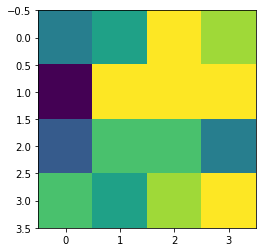

In [4]:
simg = np.r_[[[4,5,8,7],[1,8,8,8],[3,6,6,4],[6,5,7,8]]].astype(np.float32)
akernel = np.r_[[[1,4,1],[1,4,3],[3,3,1]]]

#simg = np.random.randint(10, size=(10,6))
#akernel = np.random.randint(10, size=(5,5))+1

plt.imshow(simg)

In [5]:
c1 = tf.keras.layers.Conv2D(filters=1, kernel_size=akernel.shape, activation="linear")
c1.build(input_shape=[None, *simg[:,:,None].shape])
w = c1.get_weights()
w[0] = akernel[:,:,None, None]
c1.set_weights(w)

In [6]:
routput = c1(simg[None, :, :, None]).numpy()
print(routput[0,:,:,0])

[[122. 148.]
 [126. 134.]]


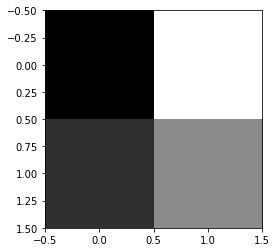

In [7]:
plt.imshow(routput[0,:,:,0], cmap=plt.cm.Greys_r)


## Task 1: Create the convolution matrix

fill in the following function to create a convolution matrix.

given:

- an input image of dimensions $h\times w$
- a squared filter (kernel) of dimensions $k \times k$
- no padding used

the resulting convolution matrix must have dimensions 

$$(h-k+1)(w-k+1) \times hw$$

suggestions:

- start with the same input image and kernel as in the example in [Up-sampling with Transposed Convolution](https://towardsdatascience.com/up-sampling-with-transposed-convolution-9ae4f2df52d0):
    
       simg = np.r_[[[4,5,8,7],[1,8,8,8],[3,6,6,4],[6,5,7,8]]]
       kernel = np.r_[[[1,4,1],[1,4,3],[3,3,1]]]
       
you should get the following

        array([[1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1., 0., 0., 0., 0., 0.],
               [0., 1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1., 0., 0., 0., 0.],
               [0., 0., 0., 0., 1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1., 0.],
               [0., 0., 0., 0., 0., 1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1.]])
       
- test with random imgs and kernels (as in the code above) with increasing dimensions and images with different width and height

In [13]:
def get_convmatrix(input_shape, kernel):
    dx, dy = np.r_[input_shape[0] - kernel.shape[0]+1, input_shape[1] - kernel.shape[1]+1]
    cm = np.zeros((np.product(input_shape), dx*dy)).T
    cx,cy=0,0
    for cx in range(dx):
        for cy in range(dy):
            for i in range(kernel.shape[1]):
                .... # your code here
    return cm

In [14]:
cm = get_convmatrix(simg.shape, akernel)
cm.shape

(4, 16)

In [15]:
cm

array([[1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1., 0., 0., 0., 0., 0.],
       [0., 1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1., 0.],
       [0., 0., 0., 0., 0., 1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1.]])

## Task 2: use the convolution matrix above to make a 2d convolution

you must get the same 2x2 result matrix as above

In [11]:
def conv2d(img,kernel):
    ... # your code here
    moutput = ... # your code here
    return moutput

In [12]:
moutput = conv2d(simg, akernel)
moutput

array([[122., 148.],
       [126., 134.]])

the following must come out `True`

In [29]:
np.allclose(routput, moutput.reshape(routput.shape))

True

## Task 3: make a transposed 2d convolution using `tf.keras.layers.Conv2DTranspose`

- Convolution took a 4x4 image into a 2x2 activation map
- Transposed convolution will take a 2x2 input image into a 4x4 activation map

`small_img` will be our 2x2 input image for the transposed convolution.

for `small_img` =

        array([[6., 5.],
               [3., 5.]], dtype=float32)

you must get the following result

        array([[ 6., 29., 26.,  5.],
               [ 9., 46., 61., 20.],
               [21., 50., 50., 20.],
               [ 9., 24., 18.,  5.]], dtype=float32)


In [20]:
small_img = np.array([[6., 5.],[3., 5.]]).astype(np.float32)
small_img

array([[6., 5.],
       [3., 5.]], dtype=float32)

In [21]:
ct = tf.keras.layers.Conv2DTranspose(... # your code here)
# your code here

In [23]:
toutput = ct(# your code here).numpy()
toutput[0,:,:,0]

array([[ 6., 29., 26.,  5.],
       [ 9., 46., 61., 20.],
       [21., 50., 50., 20.],
       [ 9., 24., 18.,  5.]], dtype=float32)

## Task 4: Make a transposed 2d convolution using the convolution matrix above

your result must be exactly the same as the previous task

In [50]:
def conv2d_transpose(img, kernel):
    # your code here
    return # your code here

In [51]:
moutput = conv2d_transpose(small_img, akernel)
moutput

array([[ 6., 29., 26.,  5.],
       [ 9., 46., 61., 20.],
       [21., 50., 50., 20.],
       [ 9., 24., 18.,  5.]])

In [53]:
np.allclose(toutput[0,:,:,0], moutput )

True